In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
filepath='C:/Users/shaha/Desktop/Springboard/DataScience_Capstone2/Datasets/Dataset_Real Estate_New York/nyc-rolling-sales.csv'
dfi=pd.read_csv(filepath)

In [6]:
#Checking null values
dfi.isna().sum().sort_values()

Unnamed: 0                        0
BUILDING CLASS AT TIME OF SALE    0
TAX CLASS AT TIME OF SALE         0
YEAR BUILT                        0
GROSS SQUARE FEET                 0
LAND SQUARE FEET                  0
TOTAL UNITS                       0
COMMERCIAL UNITS                  0
RESIDENTIAL UNITS                 0
ZIP CODE                          0
APARTMENT NUMBER                  0
ADDRESS                           0
BUILDING CLASS AT PRESENT         0
EASE-MENT                         0
LOT                               0
BLOCK                             0
TAX CLASS AT PRESENT              0
BUILDING CLASS CATEGORY           0
NEIGHBORHOOD                      0
BOROUGH                           0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
df=dfi; df=df.drop(columns=('Unnamed: 0'), axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [13]:
#Checking the name of columns
s=1
for i in df.columns:
    print('Column ',s,':',i)
    s+=1

Column  1 : BOROUGH
Column  2 : NEIGHBORHOOD
Column  3 : BUILDING CLASS CATEGORY
Column  4 : TAX CLASS AT PRESENT
Column  5 : BLOCK
Column  6 : LOT
Column  7 : EASE-MENT
Column  8 : BUILDING CLASS AT PRESENT
Column  9 : ADDRESS
Column  10 : APARTMENT NUMBER
Column  11 : ZIP CODE
Column  12 : RESIDENTIAL UNITS
Column  13 : COMMERCIAL UNITS
Column  14 : TOTAL UNITS
Column  15 : LAND SQUARE FEET
Column  16 : GROSS SQUARE FEET
Column  17 : YEAR BUILT
Column  18 : TAX CLASS AT TIME OF SALE
Column  19 : BUILDING CLASS AT TIME OF SALE
Column  20 : SALE PRICE
Column  21 : SALE DATE


In [10]:
#Dimensions of the dataframe
print('Dimensions=',df.shape)

Dimensions= (84548, 21)


### This presentation is about properties in New York City

### This study shows you the different conditions of properties in New York City including: Borough, Area, Total units, Year Built, Price ....

In [19]:
#ID number of each borough
Boroughs=['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
s=1
for i in Boroughs:
    print(i,' :    ',s)
    s+=1

Manhattan  :     1
Bronx  :     2
Brooklyn  :     3
Queens  :     4
Staten Island  :     5


In [31]:
df['BR_City']=df['BOROUGH']

In [35]:
#Changing the borough number to the name
for i in df.index:
    if df['BR_City'].iloc[i]==1:
        df['BR_City'].iloc[i]="Manhattan"
    if df['BR_City'].iloc[i]==2:
        df['BR_City'].iloc[i]="Bronx"
    if df['BR_City'].iloc[i]==3:
        df['BR_City'].iloc[i]="Brooklyn"
    if df['BR_City'].iloc[i]==4:
        df['BR_City'].iloc[i]="Queens"
    if df['BR_City'].iloc[i]==5:
        df['BR_City'].iloc[i]="Staten Island"

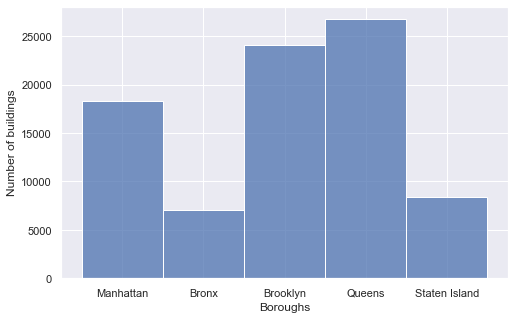

In [38]:
#Showing the number of buildings for each borough
sns.set()
plt.figure(figsize=(8,5))
sns.histplot(df['BR_City'])
plt.xlabel('Boroughs')
plt.ylabel('Number of buildings')
plt.show()

In [147]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BR_City
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan


### Borough of Queens has maximum number of buidings in the market

In [50]:
df_CM=df[df['BR_City']=='Manhattan'][['BR_City','BUILDING CLASS AT TIME OF SALE']]
df_CBRONX=df[df['BR_City']=='Bronx'][['BR_City','BUILDING CLASS AT TIME OF SALE']]
df_CBROOKLYN=df[df['BR_City']=='Brooklyn'][['BR_City','BUILDING CLASS AT TIME OF SALE']]
df_CQ=df[df['BR_City']=='Queens'][['BR_City','BUILDING CLASS AT TIME OF SALE']]
df_CS=df[df['BR_City']=='Staten Island'][['BR_City','BUILDING CLASS AT TIME OF SALE']]

In [65]:
df_CM.value_counts().head(20)

BR_City    BUILDING CLASS AT TIME OF SALE
Manhattan  R4                                7501
           D4                                5724
           R9                                 963
           C6                                 813
           R1                                 259
           RB                                 248
           D0                                 228
           RS                                 219
           RH                                 209
           C7                                 189
           C1                                 166
           C4                                 147
           C5                                 111
           R2                                  90
           V1                                  84
           RK                                  82
           C0                                  80
           H3                                  79
           A4                                  73
        

In [90]:
df_CM_selected=df_CM[(df_CM['BUILDING CLASS AT TIME OF SALE']=='R4')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='D4')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='R9')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='C6')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='R1')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='RB')|
                                                                                                        (df_CM['BUILDING CLASS AT TIME OF SALE']=='D0')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='RS')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='RH')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='C7')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='C1')|(
          df_CM['BUILDING CLASS AT TIME OF SALE']=='C4')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='C5')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='R2')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='V1')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='RK')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='C0')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='H3')|(df_CM['BUILDING CLASS AT TIME OF SALE']=='A4')|
      (df_CM['BUILDING CLASS AT TIME OF SALE']=='C3')]

In [91]:
df_CBRONX.value_counts().head(20)

BR_City  BUILDING CLASS AT TIME OF SALE
Bronx    D4                                996
         B1                                891
         C0                                747
         A5                                549
         B2                                536
         A1                                505
         R4                                440
         B3                                325
         V0                                234
         A2                                202
         C1                                178
         C3                                150
         R3                                117
         B9                                110
         K1                                 68
         C6                                 67
         C7                                 65
         G7                                 56
         C2                                 53
         V1                                 51
dtype: int64

In [92]:
df_CBRONX_selected=df_CBRONX[(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='D4')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='B1')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='C0')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='A5')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='B2')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='A1')|
                                                                                                        (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='R4')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='B3')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='V0')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='A2')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='C1')|(
          df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='C3')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='R3')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='B9')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='K1')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='C6')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='C7')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='G7')|(df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='C2')|
      (df_CBRONX['BUILDING CLASS AT TIME OF SALE']=='V1')]

In [94]:
df_CBROOKLYN.value_counts().head(20)

BR_City   BUILDING CLASS AT TIME OF SALE
Brooklyn  R4                                2817
          B1                                2267
          C0                                2175
          D4                                2155
          B3                                1274
          B2                                1179
          A5                                1170
          R1                                 956
          A1                                 880
          B9                                 857
          A9                                 831
          C3                                 634
          RG                                 554
          C6                                 534
          C2                                 468
          S2                                 463
          R3                                 437
          R2                                 424
          C1                                 387
          V0                

In [95]:
df_CBROOKLYN_selected=df_CBROOKLYN[(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='R4')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='B1')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='C0')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='D4')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='B3')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='B2')|
                                                                                                        (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='A5')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='R1')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='A1')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='B9')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='A9')|(
          df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='C3')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='RG')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='C6')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='C2')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='S2')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='R3')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='R2')|(df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='C1')|
      (df_CBROOKLYN['BUILDING CLASS AT TIME OF SALE']=='V0')]

In [97]:
df_CQ.value_counts().head(20)

BR_City  BUILDING CLASS AT TIME OF SALE
Queens   A1                                4067
         D4                                3742
         R4                                2063
         B3                                2012
         A5                                1990
         B2                                1932
         A2                                1570
         B1                                1455
         C0                                1317
         C6                                1290
         RG                                 484
         V0                                 397
         A0                                 384
         R3                                 383
         C2                                 260
         A9                                 241
         S2                                 235
         R2                                 232
         C3                                 226
         R9                                 204


In [100]:
df_CQ_selected=df_CQ[(df_CQ['BUILDING CLASS AT TIME OF SALE']=='A1')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='D4')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='R4')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='B3')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='A5')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='B2')|
                                                                                                        (df_CQ['BUILDING CLASS AT TIME OF SALE']=='A2')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='B1')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='C0')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='C6')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='RG')|(
          df_CQ['BUILDING CLASS AT TIME OF SALE']=='V0')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='A0')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='R3')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='C2')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='A9')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='S2')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='R2')|(df_CQ['BUILDING CLASS AT TIME OF SALE']=='C3')|
      (df_CQ['BUILDING CLASS AT TIME OF SALE']=='R9')]

In [103]:
df_CS.value_counts().head(20)

BR_City        BUILDING CLASS AT TIME OF SALE
Staten Island  A5                                1949
               A1                                1299
               B2                                1268
               A2                                 879
               R3                                 511
               B9                                 378
               V0                                 324
               A9                                 275
               B3                                 175
               R4                                 168
               R2                                 144
               A3                                 131
               B1                                  97
               V1                                  89
               A6                                  74
               C0                                  65
               C6                                  56
               D4                   

In [108]:
df_CS_selected=df_CS[(df_CS['BUILDING CLASS AT TIME OF SALE']=='A5')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='A1')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='B2')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='A2')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='R3')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='B9')|
                                                                                                        (df_CS['BUILDING CLASS AT TIME OF SALE']=='V0')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='A9')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='B3')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='R4')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='R2')|
          (df_CS['BUILDING CLASS AT TIME OF SALE']=='A3')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='B1')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='V1')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='C6')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='C0')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='S2')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='D4')|(df_CS['BUILDING CLASS AT TIME OF SALE']=='A0')|
      (df_CS['BUILDING CLASS AT TIME OF SALE']=='K1')]

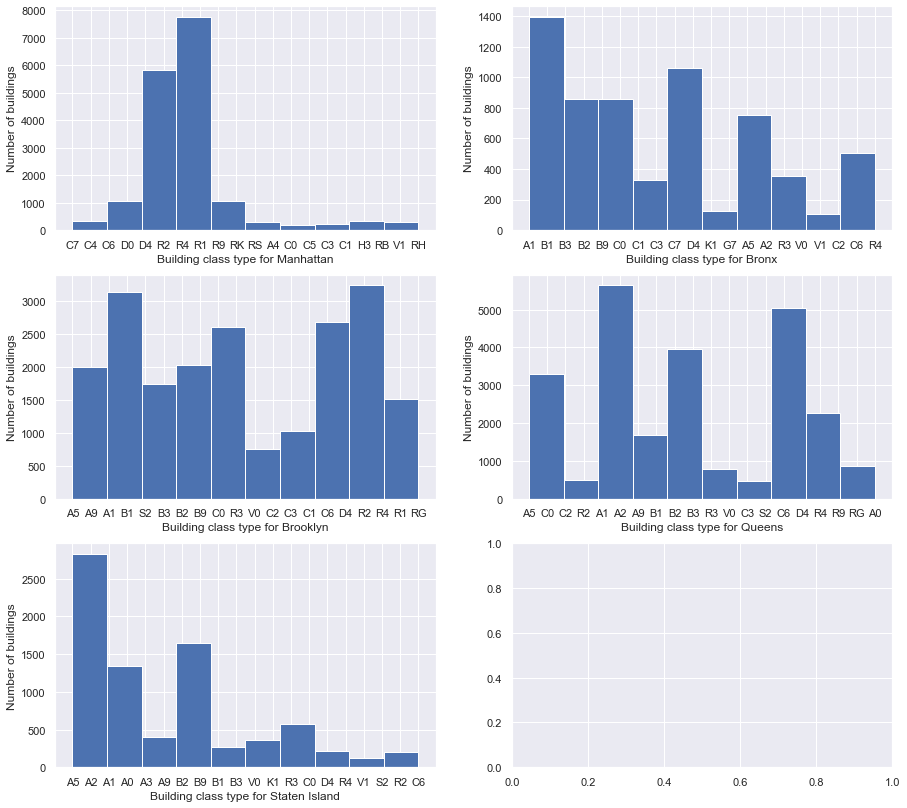

In [146]:
fig,ax=plt.subplots(3,2,figsize=(15,14))
ax[0,0].hist(df_CM_selected['BUILDING CLASS AT TIME OF SALE'])
ax[0,0].set_xlabel('Building class type for Manhattan')
ax[0,0].set_ylabel('Number of buildings')
ax[0,1].hist(df_CBRONX_selected['BUILDING CLASS AT TIME OF SALE'])
ax[0,1].set_xlabel('Building class type for Bronx')
ax[0,1].set_ylabel('Number of buildings')
ax[1,0].hist(df_CBROOKLYN_selected['BUILDING CLASS AT TIME OF SALE'])
ax[1,0].set_xlabel('Building class type for Brooklyn')
ax[1,0].set_ylabel('Number of buildings')
ax[1,1].hist(df_CQ_selected['BUILDING CLASS AT TIME OF SALE'])
ax[1,1].set_xlabel('Building class type for Queens')
ax[1,1].set_ylabel('Number of buildings')
ax[2,0].hist(df_CS_selected['BUILDING CLASS AT TIME OF SALE'])
ax[2,0].set_xlabel('Building class type for Staten Island')
ax[2,0].set_ylabel('Number of buildings')
plt.show()

### It is observed that there is a list based on the bar charts:

### Most popular type for each borough:

### Manhattan: D4

### Bronx: A1

### Brooklyn: R1

### Queens: C2

### Staten Island: A5

In [188]:
#Subsetting for some scpecific columns
df_CM_Units=df[df['BR_City']=='Manhattan'][['BR_City','GROSS SQUARE FEET','TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE']]
df_CBRONX_Units=df[df['BR_City']=='Bronx'][['BR_City','GROSS SQUARE FEET','TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE']]
df_CBROOKLYN_Units=df[df['BR_City']=='Brooklyn'][['BR_City','GROSS SQUARE FEET','TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE']]
df_CQ_Units=df[df['BR_City']=='Queens'][['BR_City','GROSS SQUARE FEET','TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE']]
df_CS_Units=df[df['BR_City']=='Staten Island'][['BR_City','GROSS SQUARE FEET','TOTAL UNITS','BUILDING CLASS AT TIME OF SALE']]

### Total units of popular buildings for each borough

In [181]:
print('Manhattan: ',df_CM_Units['TOTAL UNITS'].max())

Manhattan:  1653


In [182]:
print('Bronx: ',df_CBRONX_Units['TOTAL UNITS'].max())

Bronx:  955


In [183]:
print('Brooklyn: ',df_CBROOKLYN_Units['TOTAL UNITS'].max())

Brooklyn:  889


In [184]:
print('Queens: ',df_CQ_Units['TOTAL UNITS'].max())

Queens:  2261


In [185]:
print('Staten Island: ',df_CS_Units['TOTAL UNITS'].max())

Staten Island:  143


### Maximum gross square feet for each borough

In [195]:
print('Manhattan: ',df_CM_Units['GROSS SQUARE FEET'].max())

Manhattan:  GROSS SQUARE FEET    9992
GROSS SQUARE FEET    9992
dtype: object


In [190]:
print('Bronx: ',df_CBRONX_Units['GROSS SQUARE FEET'].max())

Bronx:  GROSS SQUARE FEET    997
GROSS SQUARE FEET    997
dtype: object


In [191]:
print('Brooklyn: ',df_CBROOKLYN_Units['GROSS SQUARE FEET'].max())

Brooklyn:  GROSS SQUARE FEET    9972
GROSS SQUARE FEET    9972
dtype: object


In [192]:
print('Queens: ',df_CQ_Units['GROSS SQUARE FEET'].max())

Queens:  GROSS SQUARE FEET    999
GROSS SQUARE FEET    999
dtype: object


In [197]:
print('Staten Island: ',df_CS_Units['GROSS SQUARE FEET'].max())

Staten Island:  997


### Some questions:

### Question: Which borough is recommended for buying based on neighborhood and price?

### Answer: Queens

### Question: Which borough has most expensive properties?

### Answer: Manhattan

### Question: If somebody wants to purchase a propery which is A class, which bouroughs are recommended?

### Aanswer: Brooklyn and Staten island

### Conclusion

### According to this study, the most frequently traded building is located in Queens.

### After Queens, Brooklyn has the most frequently traded building

### The top class for building is A1 and it is frequently sold in Bronx because of its price

### A building which has maximum total units is in Manhattan